###### Вспомогательные ячейки

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

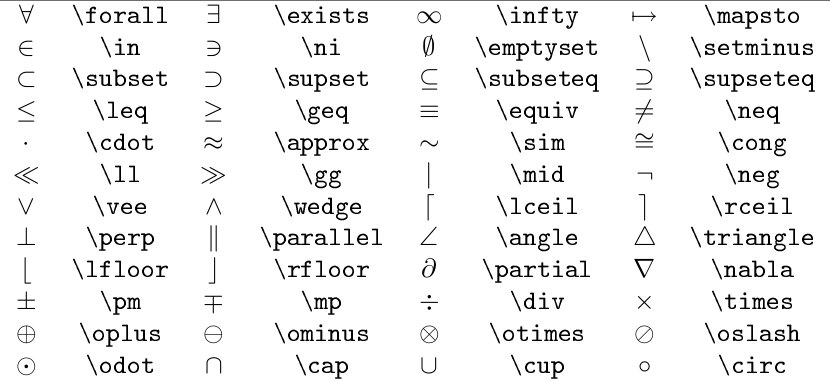

## Введение в теорию вероятностей и математическую статистику

Данный блокнот представляет собой практикум по основам теории вероятностей и элементам математической статистики, предназначенный для первоначального ознакомления с ключевыми понятиями и методами. Он охватывает широкий круг задач — от классических моделей случайных экспериментов до анализа совместных распределений и статистических характеристик случайных величин.

Материал структурирован от простого к сложному:

* В первой части рассматриваются базовые модели: классическая вероятность, геометрическая вероятность, условные вероятности и формула Байеса — всё это составляет фундамент для понимания случайности и принятия решений под неопределённостью.

* Во второй части акцент смещается на многомерные модели: совместные распределения, ковариация, корреляция, преобразования случайных величин и анализ их взаимосвязей — важные инструменты для дальнейшего изучения статистики, машинного обучения и анализа данных.

## Часть 1: Элементарная теория вероятностей и условная вероятность

### <ins>Задание 1</ins>. Независимое подбрасывание двух симметричных монет

Рассматриваются следующие события:
* A — появление герба на первой монете
* B — появление решки на первой монете
* C — появление герба на второй монете
* D — появление решки на второй монете
* E — появление хотя бы одного герба
* F — появление хотя бы одной решки
* G — появление одного герба и одной решки
* H — непоявление ни одного герба
* K — появление двух гербов

Определить, каким событиям из списка выше равносильны следующие события: <br>
(a) A+C = ? <br>
(b) AC = ? <br>
(c) EF = ? <br>
(d) G+E = ? <br>
(e) GE = ? <br>
(f) BD = ? <br>
(g) E+K = ?

**Решение**

Элементарные исходы подбрасывания двух симметричных монет (Г - герб, Р - решка):
1. ГГ
2. ГР
3. РГ
4. РР

Запишем заданные события через элементарные исходы:
* A: {ГГ, ГP}
* B: {PP, PГ}
* С: {ГГ, РГ}
* D: {РР, ГР}
* Е: {ГГ, РГ, ГР}
* F: {РР, РГ, ГР}
* G: {ГР, РГ}
* H: {РР}
* K: {ГГ}

Определяем равносильные события по условию задания: <br>
(a) A+C: {ГГ, ГР, РГ} = E  <br>
(b) AC: {ГГ} = К <br>
(c) EF: {РГ, ГР} = G <br>
(d) G+E: {ГГ, РГ, ГР} = E <br>
(e) GE: {ГР, РГ} = G <br>
(f) BD: {PP} = H <br>
(g) E+K: {ГГ, РГ, ГР} = E

### <ins>Задание 2</ins>. Производится выстрел по вращающейся круговой мишени, в которой закрашены два непересекающихся сектора с углом 20 градусов. Какова вероятность попадания в закрашенную область?

**Решение**

##### Аналитическое решение

Решать будем через геометрическое определение вероятности. Пусть $R$ - радиус круговой мишени (площадь мишени равна $\pi R^2$), а $\alpha$ - угол каждого сектора, тогда площадь одного сектора равна:

$$
\frac{\alpha}{360}\pi R^2
$$

Площадь для двух секторов равна:

$$
2\frac{\alpha}{360}\pi R^2 = \frac{\alpha}{180}\pi R^2
$$ <br>

Вероятность попадания в закрашенную область при $\alpha=20$:

<br>
$$
\frac{\frac{\alpha}{180}\pi R^2}{\pi R^2} = \frac{\alpha}{180} = \frac{20}{180} = \frac{1}{9} = 0.1(1)
$$ <br>

<u>Комментарий</u>: вращение мишени не влияет на вероятность попадания в закрашенную область, если предположить, что выстрел производится в случайный момент времени, а также при равномерном вращении мишени (с постоянной угловой скоростью) каждый сектор будет равномерно представлен в течение времени.

##### Моделируем серию выстрелов

In [ ]:
def simulate_shot(alpha):
    '''
    Возвращает True, если выстрел попал в закрашенный сектор
    '''
    rotation_angle = random.uniform(0, 360)

    # Первый сектор
    sector1_start = rotation_angle
    sector1_end = (rotation_angle + alpha) % 360

    # Второй сектор
    sector2_start = (rotation_angle + 180) % 360
    sector2_end = (rotation_angle + 180 + alpha) % 360

    painted_sectors = [
        (sector1_start, sector1_end),
        (sector2_start, sector2_end),
    ]

    shot_angle = random.uniform(0, 360)

    for sector_start, sector_end in painted_sectors:
        if sector_start < sector_end:
            if sector_start <= shot_angle < sector_end:
                return True
        else:
            # Сектор пересекает 0 градусов
            if shot_angle >= sector_start or shot_angle < sector_end:
                return True
    return False

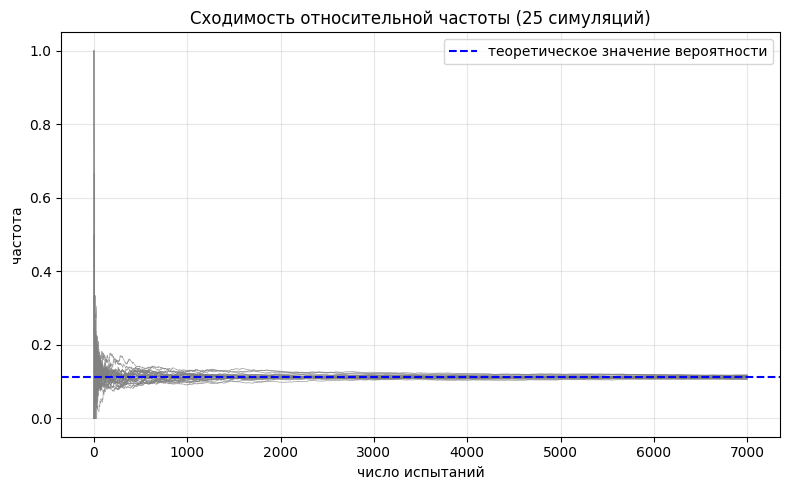

In [ ]:
# Основной эксперимент
N = 7_000  # число испытаний в каждой симуляции
n = 25     # количество симуляций
alpha = 20

plt.figure(figsize=(8, 5))

for trial in range(n):
    hits = 0
    y = []
    for i in range(1, N+1):
        if simulate_shot(alpha):
            hits += 1
        y.append(hits / i)
    plt.plot(range(1, N+1), y, color='gray', alpha=0.75, linewidth=0.5)

plt.axhline(y=alpha/180, color='b', linestyle='--', label='теоретическое значение вероятности')
plt.title(f'Сходимость относительной частоты ({n} симуляций)')
plt.xlabel('число испытаний')
plt.ylabel('частота')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### <ins>Задание 3</ins>. Два парохода должны подойти к одному и тому же причалу независимо друг от друга и равновозможно в течение суток. Определить вероятность того, что одному из них придется ожидать освобождения причала, если время стоянки первого парохода - 1 час, а второго - 2 часа.

**Решение**

Пусть $X$ - первый пароход, а $Y$ - второй пароход. Так как пароходы могут подходить к причалу в течение суток, тогда <br><br>

$$
0 \leq X \leq 24, \quad 0 \leq Y \leq 24
$$ <br>

Рассмотрим два события. Пусть первый пароход подошел к причалу первым ($X<Y$), а для того, чтобы второй пароход не ожидал освобождение причала, необходимо, чтобы <br><br>

$$
\left\{\begin{aligned}&X<Y\\&Y-X \geq 1\end{aligned}\right. \implies Y \geq X+1
$$ <br>

Аналогично для случая $Y<X$ (второй пароход пришел первым) <br><br>

$$
\left\{\begin{aligned}&Y<X\\&X-Y \geq 2\end{aligned}\right. \implies Y \leq X - 2
$$

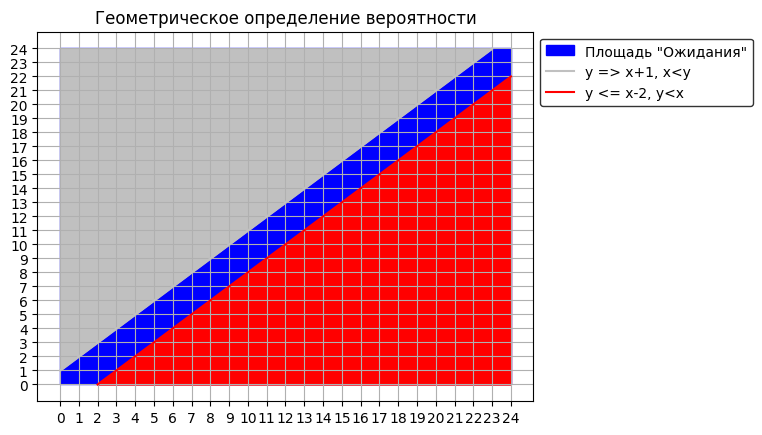

In [ ]:
working_hours = 24
stop_1 = 1
stop_2 = 2

# y>=x+1
x1 = [0, working_hours - stop_1]
y1 = [stop_1, working_hours]
color_1 = 'silver'

# y<=x-2
x2 = [stop_2, working_hours]
y2 = [0, working_hours - stop_2]
color_2 = 'red'

plt.fill([0, working_hours, working_hours, 0, 0],
         [0, 0, working_hours, working_hours, 0],
         color='blue')

plt.plot(x1, y1, color=color_1)
plt.plot(x2, y2, color=color_2)

plt.fill_between(x1, y1, working_hours, color=color_1)
plt.fill_between(x2, y2, color=color_2)

plt.title('Геометрическое определение вероятности')
plt.legend(['Площадь "Ожидания"', f'y => x+{stop_1}, x<y', f'y <= x-{stop_2}, y<x'],
           bbox_to_anchor=(1, 1),
           edgecolor='black')

plt.xticks(range(0, working_hours + 1))
plt.yticks(range(0, working_hours + 1))
plt.grid()

In [ ]:
# Площадь всех исходов (квадрат 24х24)
S_all = working_hours**2

# Площадь благоприятных исходов
S_favorable = S_all - (working_hours - stop_1)**2 / 2 - (working_hours - stop_2)**2 / 2

# Искомая вероятность
S_favorable / S_all

0.12065972222222222

### <ins>Задание 4</ins>. Самолет, по которому ведется стрельба, состоит из трех различных по уязвимости частей:
1. Кабина летчика и двигатель (1-я часть)
2. Топливные баки (2-я часть)
3. Планер (3-я часть)

Для поражения самолета достаточно либо одного попадания в первую часть, либо двух попаданий во вторую, либо трех попаданий в третью. При попадании в самолет одного снаряда, снаряд с вероятностью $p_1$ попадает в 1-ю часть, с вероятностью $p_2$ - во 2-ю часть, с вероятностью $p_3$ - в 3-ю часть. Попавшие снаряды распределяются по частям независимо друг от друга.

Известно, что в самолет попало $m$ снарядов. Найти условную вероятность $\mathsf{P}(A|m)$ события А - "Самолет поражен" - при $m = 1, 2, 3, 4$.

**Решение**

* $\quad P(A|1)=p_1$, так как для поражения самолета одним снарядом необходимо попасть в 1-ю часть;

* $\quad P(A|2)=1-P(\overline{\rm A}|2)=1-(p_3^2+2p_2p_3)$, где событие $\overline{\rm A}$ (обратное) - самолет летит дальше при 2-х попаданиях, и попадать в 1-ю часть нельзя;

* $\quad P(A|3)=1-P(\overline{\rm A}|3)=1-(p_2p_3p_3+p_3p_3p_2+p_3p_2p_3)=1-3p_2p_3^2$;

* $\quad P(A|4)=1-P(\overline{\rm A}|4)=1-0=1$, так как $\overline{\rm A}$ - пустое множество. Всё же попробуем определить вероятность того, что самолёт не будет поражен (событие $\overline{\rm A}$). Так как попадать в 1-ю часть нельзя, во 2-ю часть можно попасть не более одного раза, а оставшиеся три снаряда попадают в 3-ю часть ($p_2p_3p_3p_3,$ $p_3p_2p_3p_3$ и тд), что ведет к поражению самолёта.

Таким образом, при 4-х попаданиях самолёт всегда поражён

### <ins>Задание 5</ins>. Вероятность дефолта по кредиту
Банк выдаёт потребительские кредиты. По статистике, вероятность дефолта (неспособности вернуть кредит) у клиента с хорошей кредитной историей -- 2%, а у клиента с плохой -- 15%.
Известно, что 70% заемщиков имеют хорошую кредитную историю, а 30% -- плохую. <br><br>

Необходимо ответить на следующие вопросы:
1. Какова вероятность того, что случайно выбранный клиент, получивший кредит, его не вернёт (т.е. попадёт в дефолт)?

2. Если клиент попал в дефолт, какова вероятность, что у него была хорошая кредитная история?

**Решение**

Пусть
* $D$ -- дефолт
* $G$ -- хорошая кредитная история
* $B$ -- плохая кредитная история

тогда
* Вероятность дефолта у клиента с хорошей кредитной историей: $P(D|G) = 0.02$
* Вероятность дефолта у клиента с плохой кредитной историей: $P(D|B) = 0.15$
* Доля клиентов с хорошей кредитной историей: $P(G) = 0.7$
* Доля клиентов с плохой кредитной историей: $P(B) = 0.3$ <br><br>

Ответ на вопрос 1 (используем формулу полной вероятности): <br><br>

$$
P(D) =
P(D|G) \cdot P(G) + P(D|B) \cdot P(B) =
0.02 \cdot 0.7 + 0.15 \cdot 0.3 =
0.059
$$ <br><br>

Ответ на вопрос 2 (формула Байеса): <br><br>

$$
P(G|D) =
\frac{P(D|G) \cdot P(G)}{P(D)} =
\frac{0.02 \cdot 0.7}{0.059} \approx
0.2373
$$ <br><br>

Комментарий: несмотря на то, что дефолты среди "хороших" клиентов редки, из-за их большого количества (70%), они составляют заметную часть дефолтов.

### <ins>Задание 6</ins>. Система обнаружения мошенничества

Банк использует систему автоматического обнаружения мошеннических транзакций. Вероятность того, что система правильно обнаружит мошенническую транзакцию (чувствительность), равна 95%. Вероятность ложного срабатывания (срабатывание на честную транзакцию) — 1%. Доля мошеннических транзакций в общем потоке составляет 0.5%.

Вопрос: если система выдала предупреждение о мошенничестве, какова вероятность, что транзакция действительно мошенническая?

**Решение**

Чтобы найти вероятность того, что транзакция действительно мошенническая, при условии, что система выдала предупреждение, нужно вычислить условную вероятность:

<br> $$P(Мошенничество | Срабатывание)$$ <br>

Для этого воспользуемся формулой Байеса. Пусть
* $F$ -- транзакция мошенническая
* $\overline{F}$ -- транзакция честная
* $A$ -- система выдала предупреждение (сработала)

тогда
* $P(F) = 0.005$ -- доля мошеннических транзакций
* $P(\overline{F}) = 1 - 0.005 = 0.995$
* $P(A|F) = 0.95$ -- чувствительность (вероятность обнаружить мошенничество)
* $P(A|\overline{F}) = 0.01$ -- вероятность ложного срабатывания <br><br>

Вычислим полную вероятность срабатывания:

$$
P(A) =
P(A|F) \cdot P(F) + P(A|\overline{F}) \cdot P(\overline{F}) =
0.95 \cdot 0.005 + 0.01 \cdot 0.995 =
0.0147
$$ <br>

Теперь воспользуемся формулой Байеса:

<br>$$
P(F|A) =
\frac{P(A|F) \cdot P(F)}{P(A)} =
\frac{0.95 \cdot 0.005}{0.0147} \approx
0.3231,
$$ <br>

то есть, если система выдала предупреждение, то вероятность того, что транзакция действительно мошенническая — около 32.3%. Это может показаться низким, но объясняется тем, что мошеннические транзакции очень редки (всего 0.5%), поэтому большинство срабатываний приходится на ложные тревоги, несмотря на низкий процент ложных срабатываний.

## Часть 2: Совместные распределения и анализ случайных векторов

### <ins>Задание 1</ins>. Является ли функция $f_{\xi}(x,y)=\frac{e^{-2|y|}}{\pi(1+x^2)}$ плотностью распределения случайного вектора?

**Решение**

Чтобы проверить, является ли функция плотностью распределения, необходимо убедиться, что она удовлетворяет двум условиям: неотрицательность и нормировка.

##### **Неотрицательность**:

Необходимо убедиться, что $f_\xi(x,y) \geq 0$.

В числителе находится экспоненциальная функция, которая всегда положительна, т.е. $e^{-2|y|} > 0$, и $|y| \geq 0$ для любого $y$.

В знаменателе находится выражение $\pi(1+x^2)$. Здесь выражение $(1+x^2)$ всегда положительно, т.к. $x^2 \geq 0$ для любого $x$.

Следовательно, функция $f_\xi(x,y)$ всегда неотрицательна для всех $x$ и $y$.

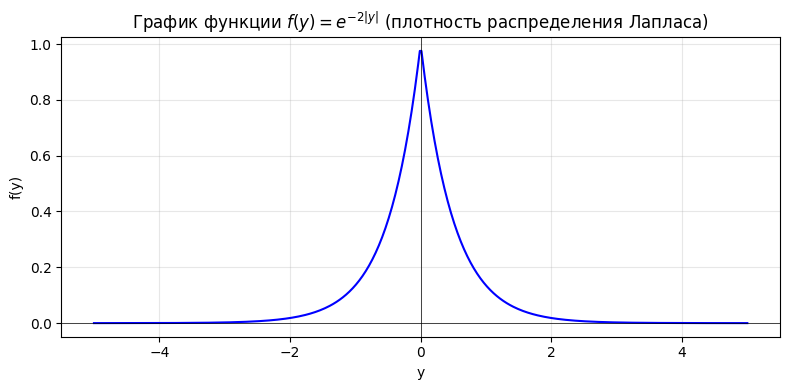

In [ ]:
# График экспоненциальной функции
y = np.linspace(-5, 5, 400)
f_y = np.exp(-2 * np.abs(y))

plt.figure(figsize=(8, 4))
plt.plot(y, f_y, label='$f(y) = e^{-2|y|}$', color='blue')

plt.title('График функции $f(y) = e^{-2|y|}$ (плотность распределения Лапласа)')
plt.xlabel('y')
plt.ylabel('f(y)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### **Нормировка**:

Необходимо вычислить двойной интеграл $\iint\limits_{-\infty}^{+\infty} f_\xi(x,y) dxdy = 1,$ т.е. проверить$,$ что $\iint\limits_{-\infty}^{+\infty} \frac{e^{-2|y|}}{\pi(1+x^2)} dxdy = 1.$ <br><br>

Сначала вычислим интеграл по $x$, а именно <br><br>

$$
\frac{1}{\pi} \int\limits_{-\infty}^{+\infty} \frac{1}{1+x^2} dx =
|таблич. случай| =
\left.\frac{1}{\pi} \arctan(x) \right|_{-\infty}^{+\infty} =
\frac{1}{\pi} [\frac{\pi}{2} - (-\frac{\pi}{2})] =
\frac{\pi}{\pi} =
1,
$$

где

$\lim\limits_{x \to +\infty} \arctan(x) = \frac{\pi}{2}$

$\lim\limits_{x \to -\infty} \arctan(x) = -\frac{\pi}{2}$ <br><br>

Далее решаем интеграл по $y$ и, используя решение интеграла по $x$, получаем окончательный ответ <br><br>

$$
\int\limits_{-\infty}^{+\infty} (e^{-2|y|} \cdot 1) dy =
\int\limits_{-\infty}^{0} e^{-2(-y)} dy + \int\limits_{0}^{+\infty} e^{-2y} dy =
\int\limits_{-\infty}^{0} e^{2y} dy + \int\limits_{0}^{+\infty} e^{-2y} dy, \quad (1)
$$ <br>

где <br><br>

$
\int\limits_{-\infty}^{0} e^{2y} dy =
\left.\frac{1}{2} e^{2y} \right|_{-\infty}^{0} =
|\lim\limits_{y \to -\infty} e^{2y} = 0| =
\frac{1}{2} \cdot 1 - 0 = \frac{1}{2}, \quad (2)
$ <br><br>

$
\int\limits_{0}^{+\infty} e^{-2y} dy =
\left.-\frac{1}{2} e^{-2y} \right|_{0}^{+\infty} =
|\lim\limits_{y \to +\infty} e^{-2y} = 0| =
0 - (-\frac{1}{2} \cdot 1) = \frac{1}{2}. \quad (3)
$ <br><br>

Тогда, подставляя решения $(2)$ и $(3)$ в $(1)$, получаем <br><br>

$$
\int\limits_{-\infty}^{+\infty} e^{-2|y|} dy =
\frac{1}{2} + \frac{1}{2} = 1
$$

или

$$
\iint\limits_{-\infty}^{+\infty} f_\xi(x,y) dxdy =
\iint\limits_{-\infty}^{+\infty} \frac{e^{-2|y|}}{\pi(1+x^2)} dxdy =
1.
$$ <br>

Таким образом, оба условия выполнены: функция $f_\xi(x,y)$ неотрицательна и нормирована. Следовательно, функция $f_\xi(x,y)$ является плотностью распределения случайного вектора.

### <ins>Задание 2</ins>. Совместное распределение случайных величин $\xi$ и $\eta$ задано таблицей:

$$
\begin{array}{ c | c | c | c }
\xi \backslash \eta & -1 & 0 & 1  \\ \hline
-1 & 1/8 & 1/12 & 7/24 \\ \hline
1 & 1/3 & 1/6 & 0
\end{array}
$$ <br>

Необходимо:

$(a)$ Найти маргинальные распределения $\xi$ и $\eta$

$(b)$ Вычислить математическое ожидание, ковариационную и корреляционную матрицы вектора ($\xi$, $\eta$)

$(c)$ Исследовать $\xi$ и $\eta$ на независимость и некоррелированность

**Решение**

##### $(a)$ Найти маргинальные распределения $\xi$ и $\eta$:

*Маргинальное распределение $\xi$*

$$
\begin{array}{ c | c | c }
\xi & -1 & 1  \\ \hline
P & \frac{1}{2} & \frac{1}{2} \\ \hline
P \xi & -\frac{1}{2} & \frac{1}{2} \\ \hline
P \xi^2 & \frac{1}{2} & \frac{1}{2}
\end{array}
$$

где <br>
$\sum P=1$, <br>
$P(\xi=-1) = \frac{1}{8} + \frac{1}{12} + \frac{7}{12} = \frac{12}{24} = \frac{1}{2}$, <br>
$P(\xi=1) = \frac{1}{3} + \frac{1}{6} = \frac{3}{6} = \frac{1}{2}$. <br><br>

*Маргинальное распределение $\eta$*

$$
\begin{array}{ c | c | c | c}
\eta & -1 & 0 & 1  \\ \hline
P & \frac{11}{24} & \frac{1}{4} & \frac{7}{24} \\ \hline
P \eta & -\frac{11}{24} & 0 & \frac{7}{24} \\ \hline
P \eta^2 & \frac{11}{24} & 0 & \frac{7}{24}
\end{array}
$$

где <br>
$\sum P=1$, <br>
$P(\eta=-1) = \frac{1}{8} + \frac{1}{3} = \frac{11}{24}$, <br>
$P(\eta=0) = \frac{1}{12} + \frac{1}{6} = \frac{1}{4}$, <br>
$P(\eta=1) = \frac{7}{24} + 0 = \frac{7}{24}$. <br><br>

*Таблица распределения для случайной величины $\xi\eta$* <br><br>

$$
\begin{array}{ c | c | c | c}
\xi\eta & -1 & 0 & 1 \\ \hline
P & \frac{5}{8} & \frac{1}{4} & \frac{1}{8} \\ \hline
P \xi\eta & -\frac{5}{8} & 0 & \frac{1}{8}
\end{array}
$$

где <br>
$\sum P=1$, <br>
$P(\xi\eta=-1) = \frac{7}{24} + \frac{1}{3} = \frac{15}{24} = \frac{5}{8}$, <br>
$P(\xi\eta=0) = \frac{1}{12} + \frac{1}{6} = \frac{3}{12} = \frac{1}{4}$, <br>
$P(\xi\eta=1) = \frac{1}{8} + 0 = \frac{1}{8}$.

##### $(b)$ Вычислить математическое ожидание, ковариационную и корреляционную матрицы вектора ($\xi$, $\eta$):

*Математическое ожидание*

$E_{\xi\eta} = \sum P \xi\eta = -\frac{5}{8} + 0 + \frac{1}{8} = -\frac{4}{8} = -\frac{1}{2}$,

$E_\xi = \sum P \xi = -\frac{1}{2} + \frac{1}{2} = 0$,

$E_\eta = \sum P \eta = -\frac{11}{24} + \frac{7}{24} = -\frac{4}{24} = -\frac{1}{6}$. <br><br>

*Дисперсия и среднеквадратичное отклонение*

$E_{\xi^2} = \sum P \xi^2 = \frac{1}{2} + \frac{1}{2} = 1$,

$D_\xi = E_{\xi^2} - (E_\xi)^2 = 1 - 0^2 = 1$,

$\sigma_\xi = \sqrt{D_\xi} = \sqrt{1} = 1$.

$E_{\eta^2} = \sum P \eta^2 = \frac{11}{24} + 0 + \frac{7}{24} = \frac{18}{24} = \frac{3}{4}$,

$D_\eta = E_{\eta^2} - (E_\eta)^2 = \frac{3}{4} - (-\frac{1}{6})^2 = \frac{3}{4} - \frac{1}{36} = \frac{26}{36} = \frac{13}{18}$,

$\sigma_\eta = \sqrt{D_\eta} = \sqrt{\frac{13}{18}} = \frac{1}{3} \sqrt{\frac{13}{2}}$. <br><br>

*Ковариация и коэффициент корреляции двух случайных величин $\xi$ и $\eta$*

$cov(\xi, \eta) = cov(\eta, \xi) = E_{\xi\eta} - E_\xi E_\eta = -\frac{1}{2} - 0 \cdot (-\frac{1}{6}) = -\frac{1}{2} \not= 0,$ <br>

$
r(\xi,\eta) =
r(\eta,\xi) =
\frac{\mathsf{cov}(\xi, \eta)}{\sigma_\xi \cdot \sigma_\eta} =
\frac{\mathsf{cov}(\eta, \xi)}{\sigma_\eta \cdot \sigma_\xi} =
\frac{-\frac{1}{2}}{1 \cdot \sqrt{\frac{13}{18}}} =
-\frac{3}{2} \sqrt{\frac{2}{13}}.
$ <br><br>

*Ковариационная матрица* <br><br>

$$
\Sigma = \begin{bmatrix}
D_\xi & cov(\xi, \eta) \\
cov(\eta, \xi) & D_\eta
\end{bmatrix}
=
\begin{bmatrix}
1 & -\frac{1}{2} \\
-\frac{1}{2} & \frac{13}{18}
\end{bmatrix}
\approx
\begin{bmatrix}
1 & -0.5 \\
-0.5 & 0.72
\end{bmatrix},
$$
где <br>
$cov(\xi, \xi) = D_\xi$ <br>
$cov(\eta, \eta) = D_\eta$ <br><br>

*Корреляционная матрица* <br><br>

$$
R = \begin{bmatrix}
1 & r(\xi,\eta) \\
r(\eta,\xi) & 1
\end{bmatrix}
=
\begin{bmatrix}
1 & -\frac{3}{2} \sqrt{\frac{2}{13}} \\
-\frac{3}{2} \sqrt{\frac{2}{13}} & 1
\end{bmatrix}
\approx
\begin{bmatrix}
1 & -0.5883 \\
-0.5883 & 1
\end{bmatrix}.
$$

##### $(c)$ Исследовать $\xi$ и $\eta$ на независимость и некоррелированность:

$\xi$ и $\eta$ отрицательно коррелированы и зависимы (независимость влечёт некоррелированность, но не наоборот)

### <ins>Задание 3</ins>. Пусть имеются два одинаковых тетраэдра с числами $1, 2, 3, 4$ на гранях. Подкидываем оба и смотрим на выпавшие числа $\xi_1$ и $\xi_2$.

Зададим следующие случайные величины:

$$ \phi_1 = \xi_1 + \xi_2, $$ <br>

$$
\phi_2 = \left\{\begin{aligned} & 1, \quad (\xi_1 \vdots \xi_2) \cup (\xi_2 \vdots \xi_1)\\ & 0, \quad else \end{aligned}\right.  
$$ <br>

Необходимо:

$(a)$ составить таблицу совместного распределения $\phi_1$ и $\phi_2$

$(b)$ найти маргинальные распределения $\phi_1$ и $\phi_2$

$(c)$ вычислить математическое ожидание, ковариационную и корреляционную матрицы вектора ($\phi_1$, $\phi_2$)

**Решение**

##### $(a)$ составить таблицу совместного распределения $\phi_1$ и $\phi_2$

Сначала определим все возможные комбинации значений $\xi_1$ и $\xi_2$. Каждый тетраэдр может показать числа от 1 до 4, и всего возможных исходов будет $4^2 = 16$ комбинаций.

In [ ]:
# Рассматриваем все возможные комбинации

xi_1 = np.array([j for i in range(1, 5) for j in [i] * 4])

xi_2 = np.array(4 * [j for j in range(1, 5)])

phi_1 = xi_1 + xi_2

phi_2 = np.where((xi_1 % xi_2 == 0) | (xi_2 % xi_1 == 0), 1, 0)

df = pd.DataFrame(
    {
    'xi_1': xi_1,
    'xi_2': xi_2,
    'phi_1': phi_1,
    'phi_2': phi_2
    }, index=range(1, 17)
)

df

,xi_1,xi_2,phi_1,phi_2
1,1,1,2,1
2,1,2,3,1
3,1,3,4,1
4,1,4,5,1
5,2,1,3,1
6,2,2,4,1
7,2,3,5,0
8,2,4,6,1
9,3,1,4,1
10,3,2,5,0


In [ ]:
df['phi_1'].value_counts().sort_index()

,count
phi_1,
2,1
3,2
4,3
5,4
6,3
7,2
8,1


Тогда таблица совместного распределения (вероятность одного исхода равна $\frac{1}{16}$): <br><br>

$$
\begin{array}{ c | c | c | c }
\phi_1 \backslash \phi_2 & 0 & 1 & - \\ \hline
2 & 0 & 1/16 & 1/16 \\ \hline
3 & 0 & 2/16 & 2/16\\ \hline
4 & 0 & 3/16 & 3/16 \\ \hline
5 & 2/16 & 2/16 & 4/16 \\ \hline
6 & 0 & 3/16 & 3/16 \\ \hline
7 & 2/16 & 0 & 2/16 \\ \hline
8 & 0 & 1/16 & 1/16\\ \hline
- & 4/16 & 12/16 & 1
\end{array}
$$

##### $(b)$ найти маргинальные распределения $\phi_1$ и $\phi_2$

*Маргинальное распределение $\phi_1$* <br><br>

$$
\begin{array}{ c | c | c | c | c | c | c | c | c |}
\phi_1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 \\ \hline
P & 1/16 & 2/16 & 3/16 & 4/16 & 3/16 & 2/16 & 1/16 \\ \hline
P\phi_1 & 2/16 & 6/16 & 12/16 & 20/16 & 18/16 & 14/16 & 8/16 \\ \hline
P\phi_1^2 & 4/16 & 18/16 & 48/16 & 100/16 & 108/16 & 98/16 & 64/16
\end{array}
$$ <br>

*Маргинальное распределение $\phi_2$* <br><br>

$$
\begin{array}{ c | c | c }
\phi_2 & 0 & 1 \\ \hline
P & 4/16 & 12/16 \\ \hline
P\phi_2 & 0 & 12/16 \\ \hline
P\phi_2^2 & 0 & 12/16
\end{array}
$$ <br>

*Распределение $\phi_1\phi_2$* <br><br>

$$
\begin{array}{ c | c | c | c | c | c | c | c | c | c}
\phi_1\phi_2 & 0 & 2 & 3 & 4 & 5 & 6 & 7 & 8 \\ \hline
P & 4/16 & 1/16 & 2/16 & 3/16 & 2/16 & 3/16 & 0 & 1/16 \\ \hline
P\phi_1\phi_2 & 0 & 2/16 & 6/16 & 12/16 & 10/16 & 18/16 & 0 & 8/16
\end{array}
$$

##### $(c)$ вычислить математическое ожидание, ковариационную и корреляционную матрицы вектора ($\phi_1$, $\phi_2$)

*Математическое ожидание* <br><br>

$E_{\phi_1\phi_2} = \sum P\phi_1\phi_2 = \frac{56}{16} = \frac{14}{4}$

$E_{\phi_1} = \sum P\phi_1 = \frac{80}{16} = 5$

$E_{\phi_2} = \sum P\phi_2 = \frac{12}{16} = \frac{3}{4}$ <br><br>

*Дисперсия и среднеквадратичное отклонение* <br><br>

$E_{\phi_1^2} = \sum P \phi_1^2 = \frac{440}{16} = \frac{55}{2}$

$
D_{\phi_1} = E_{\phi_1^2} - (E_{\phi_1})^2 = \frac{55}{2} - 5^2 = \frac{5}{2}
\implies
\sigma_{\phi_1} = \sqrt{D_{\phi_1}} = \sqrt{\frac{5}{2}}
$ <br><br>

$E_{\phi_2^2} = \sum P \phi_2^2 = \frac{12}{16} = \frac{3}{4}$

$
D_{\phi_2} = E_{\phi_2^2} - (E_{\phi_2})^2 = \frac{3}{4} - (\frac{3}{4})^2 = \frac{3}{16}
\implies
\sigma_{\phi_2} = \sqrt{D_{\phi_2}} = \sqrt{\frac{3}{16}}
$ <br><br>

*Ковариация и коэффициент корреляции двух случайных величин $\phi_1$ и $\phi_2$* <br><br>

$
cov(\phi_1, \phi_2) =
cov(\phi_2, \phi_1) =
E_{\phi_1\phi_2} - E_{\phi_1} E_{\phi_2} =
\frac{14}{4} - 5 \cdot (\frac{3}{4})
= -\frac{1}{4}
$ <br><br>

$
r(\phi_1, \phi_2) =
r(\phi_2, \phi_1) =
\frac{\mathsf{cov}(\phi_1, \phi_2)}{\sigma_{\phi_1} \sigma_{\phi_2}} =
\frac{\mathsf{cov}(\phi_2, \phi_1)}{\sigma_{\phi_2} \sigma_{\phi_1}} =
-\frac{\frac{1}{4}}{\sqrt{\frac{5}{2}}\sqrt{\frac{3}{16}}} =
-\frac{4 \sqrt{2}}{4 \sqrt{15}} =
-\sqrt{\frac{2}{15}}
$ <br><br>

*Ковариационная матрица* <br><br>

$$
\Sigma = \begin{bmatrix}
D_{\phi_1} & cov(\phi_1, \phi_2) \\
cov(\phi_2, \phi_1) & D_{\phi_2}
\end{bmatrix}
=
\begin{bmatrix}
\frac{5}{2} & -\frac{1}{4} \\
-\frac{1}{4} & \frac{3}{16}
\end{bmatrix}
\approx
\begin{bmatrix}
2.5 & -0.25 \\
-0.25 & 0.19
\end{bmatrix},
$$

где

$cov(\phi_1, \phi_1) = D_{\phi_1}$

$cov(\phi_2, \phi_2) = D_{\phi_2}$ <br><br>

*Корреляционная матрица* <br><br>

$$
R = \begin{bmatrix}
1 & r(\phi_1,\phi_2) \\
r(\phi_2,\phi_1) & 1
\end{bmatrix}
=
\begin{bmatrix}
1 & -\sqrt{\frac{2}{15}} \\
-\sqrt{\frac{2}{15}} & 1
\end{bmatrix}
\approx
\begin{bmatrix}
1 & -0.37 \\
-0.37 & 1
\end{bmatrix}
$$

### <ins>Задание 4</ins>. Пусть $\xi \sim U_{-\pi, \pi},$ $\eta_1=cos(\xi),$ $\eta_2=sin(\xi)$

Необходимо:

$(a)$ вычислить математическое ожидание, ковариационную и корреляционную матрицы вектора $(\eta_1, \eta_2)$

$(b)$ исследовать $\eta_1$ и $\eta_2$ на независимость и некоррелированность



**Решение**

##### $(a)$ вычислить математическое ожидание, ковариационную и корреляционную матрицы вектора $(\eta_1, \eta_2)$

Запишем функцию плотности $f(\xi)$ для СВ $\xi$, имеющей равномерное распределение <br><br>

$$
f(\xi) =
\left\{\begin{aligned} & \frac{1}{\pi - (-\pi)} = \frac{1}{2\pi}, \quad -\pi \leq \xi \leq \pi \\ & 0, \quad else \end{aligned}\right.  
$$ <br>

Математическое ожидание абсолютно непрерывной случайной величины на отрезке $[a, b]$ определяется как <br><br>

$$
M[X] = \int\limits_{a}^{b} xf(x) dx.
$$ <br>

$1.$ Математическое ожидание

$
E(\eta_1) =
E[cos(\xi)] =
\int\limits_{-\pi}^{\pi} cos(\xi) \frac{1}{2\pi} d\xi =
\frac{1}{2\pi} \int\limits_{-\pi}^{\pi} cos(\xi) d\xi =
\left.\frac{1}{2\pi} sin(\xi) \right|_{-\pi}^{\pi} =
\frac{1}{2\pi} [sin(\pi) - sin(-\pi)] =
\frac{sin(\pi) - [-sin(\pi)]}{2\pi} =
\frac{0 + 0}{2\pi} = 0
$ <br><br>

$
E(\eta_2) =
E[sin(\xi)] =
\int\limits_{-\pi}^{\pi} sin(\xi) \frac{1}{2\pi} d\xi =
\frac{1}{2\pi} \int\limits_{-\pi}^{\pi} sin(\xi) d\xi =
\left.-\frac{1}{2\pi} cos(\xi) \right|_{-\pi}^{\pi} =
-\frac{1}{2\pi} [cos(\pi) - cos(-\pi)] =
-\frac{cos(\pi) - cos(\pi)}{2\pi} =
-\frac{-1 - (-1)}{2\pi} = 0
$ <br><br>

Таким образом, вектор математического ожидания $E(\overline{\rm \eta}) = (0; 0)$ <br><br>

$2.$ Ковариационная матрица

$$
\Sigma = \begin{bmatrix}
cov(\eta_1, \eta_1) & cov(\eta_1, \eta_2) \\
cov(\eta_2, \eta_1) & cov(\eta_2, \eta_2)
\end{bmatrix}
=
\begin{bmatrix}
D(\eta_1) & cov(\eta_1, \eta_2) \\
cov(\eta_2, \eta_1) & D(\eta_2)
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{2} & 0 \\
0 & \frac{1}{2}
\end{bmatrix}
$$ <br>

Определяем коэффициенты ковариации

---

$
cov(\eta_1, \eta_1) =
D(\eta_1) =
E(\eta_1^2) - [E(\eta_1)]^2 =
E(\eta_1^2) - 0^2 =
E(\eta_1^2) =
E[cos^2(\xi)] =
\int\limits_{-\pi}^{\pi} \frac{cos^2(\xi)}{2\pi} d\xi =
\frac{1}{2\pi} \int\limits_{-\pi}^{\pi} \frac{1 + cos(2\xi)}{2} d\xi =
\frac{1}{4\pi} \int\limits_{-\pi}^{\pi} d\xi + \frac{1}{4\pi} \int\limits_{-\pi}^{\pi} cos(2\xi) d\xi,
\quad (1)
$ <br><br>

где

$
\frac{1}{4\pi} \int\limits_{-\pi}^{\pi} d\xi =
\left.\frac{1}{4\pi} \xi \right|_{-\pi}^{\pi} =
\frac{1}{4\pi} [\pi - (-\pi)] =
\frac{2\pi}{4\pi} =
\frac{1}{2}, \quad (2)
$

$
\frac{1}{4\pi} \int\limits_{-\pi}^{\pi} cos(2\xi) d\xi =
|u = 2\xi, d\xi = \frac{du}{2}| =
\frac{1}{4\pi} \int\limits_{-2\pi}^{2\pi} cos(u) \frac{du}{2} =
\left.\frac{1}{8\pi} sin(u) \right|_{-2\pi}^{2\pi} =
\frac{1}{8\pi} [sin(2\pi) - sin(-2\pi)] =
\frac{1}{8\pi} [sin(2\pi) + sin(2\pi)] =
\frac{sin(2\pi)}{4\pi} =
\frac{0}{4\pi} = 0. \quad (3)
$ <br><br>

Подставляя $(2)$ и $(3)$ в $(1)$, получаем, что $D(\eta_1) = \frac{1}{2} + 0 = \frac{1}{2}$ <br><br>

---

$
cov(\eta_2, \eta_2) =
D(\eta_2) =
E(\eta_2^2) - [E(\eta_2)]^2 =
E(\eta_2^2) - 0^2 =
E(\eta_2^2) =
E[sin^2(\xi)] =
\int\limits_{-\pi}^{\pi} \frac{sin^2(\xi)}{2\pi} d\xi =
\frac{1}{2\pi} \int\limits_{-\pi}^{\pi} \frac{1 - cos(2\xi)}{2} d\xi =
\frac{1}{4\pi} \int\limits_{-\pi}^{\pi} d\xi - \frac{1}{4\pi} \int\limits_{-\pi}^{\pi} cos(2\xi) d\xi,
$

т.е. $D(\eta_2) = \frac{1}{2} - 0 = \frac{1}{2}$ <br><br>

---

$
cov(\eta_1, \eta_2) =
cov(\eta_2, \eta_1) =
E[(\eta_1 - E[\eta_1])(\eta_2 - E[\eta_2])] =
E[(cos(\xi) - 0)(sin(\xi) - 0)] =
E[cos(\xi)sin(\xi)] =
$

$
\int\limits_{-\pi}^{\pi} cos(\xi)sin(\xi) \frac{1}{2\pi} d\xi =
\frac{1}{2\pi} \int\limits_{-\pi}^{\pi} \frac{sin(2\xi)}{2} d\xi =
\frac{1}{4\pi} \int\limits_{-\pi}^{\pi} sin(2\xi) d\xi =
|u = 2\xi, d\xi = \frac{du}{2}| =
\frac{1}{4\pi} \int\limits_{-2\pi}^{2\pi} sin(u) \frac{du}{2} =
\left.-\frac{1}{8\pi} cos(u) \right|_{-2\pi}^{2\pi} =
$
$
=
-\frac{1}{8\pi} [cos(2\pi) - cos(-2\pi)] =
-\frac{1}{8\pi} [cos(2\pi) - cos(2\pi)] = 0
$ <br><br>

---

<br> $3.$ Матрица корреляции

$$
R =
\begin{bmatrix}
r_{\eta_1, \eta_1} & r_{\eta_1, \eta_2} \\
r_{\eta_2, \eta_1} & r_{\eta_2, \eta_2}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix},
$$

где

$r_{\eta_1, \eta_1} = \frac{D(\eta_1)}{\sqrt{D(\eta_1)} \sqrt{D(\eta_1)}} = 1$

$r_{\eta_2, \eta_2} = \frac{D(\eta_2)}{\sqrt{D(\eta_2)} \sqrt{D(\eta_2)}} = 1$

$
r_{\eta_1, \eta_2} =
r_{\eta_2, \eta_1} =
\frac{cov(\eta1, \eta_2)}{\sqrt{D(\eta_1)} \sqrt{D(\eta_2)}} =
\frac{0}{\sqrt{\frac{1}{2}}\sqrt{\frac{1}{2}}} = 0
$

##### $(b)$ исследовать $\eta_1$ и $\eta_2$ на независимость и некоррелированность

$\eta_1$ и $\eta_2$ некоррелированы, т.к. коэффициенты корреляции и ковариации равны нулю. Однако, некоррелированность не подразумевает независимость. Зависимость есть, но она не является линейной, так как

<br>
$$\eta_1^2 + \eta_2^2 = cos^2(\xi) + sin^2(\xi) = 1$$
<br>

Ответ: некоррелированные, но зависимые случайные величины

### <ins>Задание 5</ins>. Найти плотность распределения суммы двух независимых случайных величин $\xi$ и $\eta$, если $\xi$ $\sim$ $Exp(2)$ и $\eta$ $\sim$ $U_{0, 1}$

**Решение**

Для нахождения плотности распределения $f_{\xi + \eta}(z)$, где $\xi$ распределена по экспоненциальному закону с параметром $\lambda = 2$, а $\eta$ равномерно распределена на отрезке $[0; 1]$.

Найдем плотность распределения $\xi + \eta$ через свёртку: <br><br>

$$
f_{\xi + \eta}(z) = \int\limits_{-\infty}^{\infty} f_\xi(t)f_\eta(z-t) dt,
$$ <br>

где

* для экспоненциального распределения плотность равна <br><br>

$$
f_\xi(x) = \left\{\begin{aligned} & 2e^{-2x}, \quad x \geq 0\\ & 0, \quad x < 0 \end{aligned}\right.
$$ <br>

* для равномерного распределения плотность равна <br><br>

$$
f_\eta(y) = \left\{\begin{aligned} & \frac{1}{1-0} = 1, \quad 0 \leq y \leq 1 \\ & 0, \quad else \end{aligned}\right.
$$ <br><br>

Так как $f_\eta(z-t) \neq 0$ только при

$0 \leq z-t \leq 1$

или

$z-1 \leq t \leq z,$

$f_\xi \neq 0$ только при $t \geq 0,$ то область интегрирования:

$t \in [max(0, z-1), min(\infty, z)] = [max(0, z-1), z],$ при условии, что нижний предел $\leq$ верхнего. <br><br>

Поскольку $\xi \geq 0,$ $\eta \in [0, 1],$ то $\xi + \eta \in [0, \infty).$ <br><br>

Вычисление интегралов

$
f_{\xi+\eta}(z) =
\int\limits_{0}^{z} 1 \cdot 2e^{-2t} dt =
-\frac{2}{2} e^{-2t}|_{0}^{z} =
-e^{-2z} - (-e^{-2 \cdot 0}) =
-e^{-2z} + 1 =
1 - e^{-2z}
$

и

$
f_{\xi+\eta}(z) =
\int\limits_{z-1}^{z} 1 \cdot 2e^{-2t} dt =
-e^{-2t}|_{z-1}^{z} =
-e^{-2z} - [-e^{-2(z-1)}] =
e^{2(1-z)} - e^{-2z} =
(e^2-1)e^{-2z}
$ <br><br>

Окончательно

$$
f_{\xi+\eta}(z) = \begin{cases}
0, & 0 < z \\
1-e^{-2z}, & 0 \leq z \leq 1 \\
(e^2-1)e^{-2z}, & z > 1 \\
\end{cases}
$$ <br><br>

Выполним проверку, т.е. проверим $\int\limits_{0}^{+\infty} f_{\xi+\eta}(z) dz = 1$, а именно <br><br>

$$
\int\limits_{0}^{1} dz - \int\limits_{0}^{1} e^{-2z} dz + \int\limits_{1}^{+\infty} e^{2(1-z)} dz - \int\limits_{1}^{+\infty} e^{-2z} dz = 1,
$$ <br>

где <br><br>

$
\int\limits_{0}^{1} dz - \int\limits_{0}^{1} e^{-2z} dz = 1 - [-\frac{1}{2}(e^{-2} - e^0)] =
1 + \frac{e^{-2}}{2} - \frac{1}{2}
$ <br><br>

$
\int\limits_{1}^{+\infty} e^{2(1-z)} dz =
\int\limits_{1}^{+\infty} e^2 \cdot e^{-2z} dz=
-\frac{e^2}{2}[0 - e^{-2}] =
\frac{1}{2}
$ <br><br>

$
-\int\limits_{1}^{+\infty} e^{-2z} dz =
\frac{1}{2} [0 - e^{-2}] =
-\frac{e^{-2}}{2}
$ <br><br>

По итогу имеем:
$
1 + \frac{e^{-2}}{2} - \frac{1}{2} + \frac{1}{2} - \frac{e^{-2}}{2} = 1
$

### <ins>Задание 6</ins>. Пусть совместное распределение двух СВ задано таблицей

$$
\begin{array}{ c | c | c | c | c}
\xi \backslash \eta & 1 & 2 & 3 & ...  \\ \hline
-1 & \frac{2}{5} \frac{1}{2^1} & \frac{2}{5} \frac{1}{2^2} & \frac{2}{5} \frac{1}{2^3} & ... \\ \hline
0 & \frac{1}{5} \frac{1}{2^1} & \frac{1}{5} \frac{1}{2^2} & \frac{1}{5} \frac{1}{2^3} & ... \\ \hline
1 & \frac{2}{5} \frac{1}{2^1} & \frac{2}{5} \frac{1}{2^2} & \frac{2}{5} \frac{1}{2^3} & ...
\end{array}
$$ <br>

где $\eta$ принимает все значения из $N$. Необходимо вычислить корреляционную матрицу

**Решение** <br><br>

* Сумма бесконечно уменьшающейся геометрической прогрессии рассчитывается по формуле

$$
S = \frac{b_1}{1 - q},
$$

где $q = \frac{b_2}{b_1}$

Для последовательности $\frac{1}{2^1}, \frac{1}{2^2}, ..., \frac{1}{2^n}$ при $n \in [1, \infty)$ получаем, что

$$
S = \frac{\frac{1}{2}}{1 - \frac{\frac{1}{4}}{\frac{1}{2}}} = 1
$$ <br>

* Найдем маргинальное распределение $\xi$ <br><br>

$$
\begin{array}{ c | c | c | c | c}
\xi & -1 & 0 & 1 & -  \\ \hline
P & \frac{2}{5} & \frac{1}{5} & \frac{2}{5} & \sum P = 1
\end{array}
$$ <br>

где

$
P(\xi=-1) =
\sum P(\xi=-1, \eta=n) =
\sum \frac{2}{5} \frac{1}{2^n} =
\frac{2}{5} \cdot 1 =
\frac{2}{5}
$

$
P(\xi=0) =
\sum P(\xi=0, \eta=n) =
\sum \frac{1}{5} \frac{1}{2^n} =
\frac{1}{5} \cdot 1 =
\frac{1}{5}
$

$
P(\xi=1) =
\sum P(\xi=1, \eta=n) =
\sum \frac{2}{5} \frac{1}{2^n} =
\frac{2}{5} \cdot 1 =
\frac{2}{5}
$ <br><br>

* Найдем маргинальное распределение $\eta$ <br><br>

$$
\begin{array}{ c | c | c | c | c | c}
\eta & 1 & 2 & 3 & ... & -  \\ \hline
P & \frac{1}{2^1} & \frac{1}{2^2} & \frac{1}{2^3} & ... & \sum P = 1
\end{array}
$$ <br>

где

$
P(\eta = n) =
P(-1, n) + P(0, n) + P(1, n) =
\frac{2}{5} \frac{1}{2^n} + \frac{1}{5} \frac{1}{2^n} + \frac{2}{5} \frac{1}{2^n} =
\frac{1}{2^n}
$ <br><br>

* Определим распределение $\xi \eta$ <br><br>

$$
\begin{array}{ c | c | c | c | c | c | c | c | c | c | c}
\xi \eta & ... & -3 & -2 & -1 & 0 & 1 & 2 & 3 & ... & - \\ \hline
P & ... & \frac{2}{5} \frac{1}{2^3} & \frac{2}{5} \frac{1}{2^2} & \frac{2}{5} \frac{1}{2^1} & \frac{1}{5} & \frac{2}{5} \frac{1}{2^1} & \frac{2}{5} \frac{1}{2^2} & \frac{2}{5} \frac{1}{2^3} & ... & \sum P = 1
\end{array}
$$ <br>

* Математическое ожидание

$
E_{\xi} =
-1 \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} =
0
$

$
E_{\eta} =
\sum n \frac{1}{2^n} =
2
$ <br><br>

где

$\sum n \frac{1}{2^n}$ можно определить, если вспомнить стандартный вид геометрической прогрессии: $\sum x^n = \frac{1}{1-x}$, $|x| < 1$. Тогда, взяв произвудную $\sum n x^{n-1} = \frac{1}{(1-x)^2}$ и домножив обе части на $x$, получим $\sum n x^n = \frac{x}{(1-x)^2}$. Далее подставляем $x = \frac{1}{2}$ в последнее равенство и получаем, что $\sum n \frac{1}{2^n} = 2$.

Забегая вперед, определим сразу $\sum n^2 \frac{1}{2^n}$. По аналогии возьмем производную от $\sum n x^n = \frac{x}{(1-x)^2}$, тогда $\sum n^2 x^{n-1} = \frac{2}{(1-x)^3} + \frac{1}{(1-x)^2}$, домножаем на $x$ и получаем $\sum n^2 x^n = \frac{2x}{(1-x)^3} + \frac{x}{(1-x)^2}$. Подставляем $x = \frac{1}{2}$ в последнее равенство и получаем, что $\sum n^2 \frac{1}{2^n} = 6$. <br><br>

* Дисперсия

$
D_{\xi} =
E_{\xi^2} - E_{\xi}^2 =
\frac{4}{5} - 0^2 =
\frac{4}{5}
$

$
D_{\eta} =
E_{\eta^2} - E_{\eta}^2 =
6 - 2^2 =
2
$

где

$
E_{\xi^2} =
(-1)^2 \cdot \frac{2}{5} + 0^2 \cdot \frac{1}{5} + 1^2 \cdot \frac{2}{5} =
\frac{4}{5}
$

$
E_{\eta^2} =
\sum n^2 \frac{1}{2^n} =
6
$ <br><br>

* Коэффициенты ковариации и корреляции двух СВ $\xi$ и $\eta$ <br><br>

$
cov(\xi, \eta) =
cov(\eta, \xi) =
E_{\xi \eta} - E_{\xi} E_{\eta} =
0 - 0 \cdot 2 =
0
$

где

$
E_{\xi \eta} =
-\sum n \frac{2}{5} \frac{1}{2^n} + 0 \cdot \frac{1}{5} + \sum n \frac{2}{5} \frac{1}{2^n} =
-2 \cdot \frac{2}{5} + 2 \cdot \frac{2}{5} =
0
$ <br><br>

Тогда

$
r(\xi, \eta) =
r(\eta, \xi) =
\frac{cov(\xi, \eta)}{\sqrt{D_{\xi}} \sqrt{D_{\eta}}} =
\frac{0}{\sqrt{D_{\xi}} \sqrt{D_{\eta}}} =
0
$ <br><br>

* Матрица корреляции для двух СВ $\xi$ и $\eta$ <br><br>

$$
R = \begin{bmatrix}
1 & r(\xi,\eta) \\
r(\eta,\xi) & 1
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

### <ins>Задание 7</ins>. Дана плотность распределения случайной величины $\xi$:

$$
f_{\xi}^{\lambda, a}(x) =
\begin{cases}
\lambda e^{-\lambda(x-a)}, & x \geq a \\
0, & else
\end{cases},
$$

где $(\lambda; a) = (2; 2)$


Необходимо аналитически вычислить моду, математическое ожидание и медиану

**Решение**

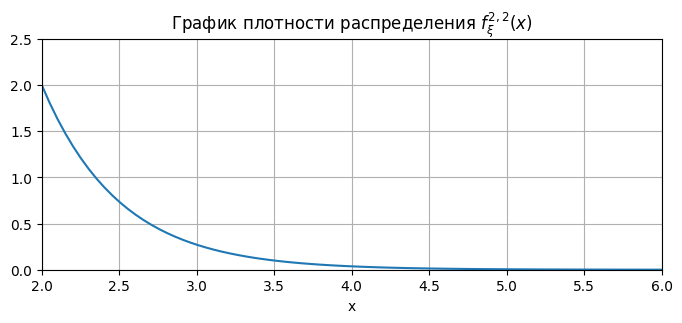

In [ ]:
# График плотности распределения
a = 2
lam = 2

x = np.linspace(a, 7, 100)
y = lam * np.exp(-lam * (x - a))

plt.figure(figsize=(8, 3))
plt.plot(x, y)
plt.title('График плотности распределения $f_{\\xi}^{2, 2}(x)$')
plt.xlabel('x')
plt.xlim(2, 6)
plt.ylim(0, 2.5)
plt.grid()

* Мода $Mo$ — это значение, при котором функция плотности достигает максимума. В данном случае, функция $f_{\xi}^{\lambda, a}(x)$ убывает на интервале $[a, \infty)$ и достигает максимума в точке $a$, т.е.

$$
Mo =
f_{\xi}^{\lambda, a}(a) =
\lambda \cdot e^{-\lambda (a - a)} =
\lambda \cdot 1 =
\lambda
$$

* Медиана $Me$ - это такое значение, при котором площадь вероятности слева от $Me$ равна площади справа от $Me$, т.е. работаем с равенством $\int_a^{Me} f_{\xi}^{\lambda, a}(x) dx = \frac{1}{2}$ для определения $Me$. <br><br>

Вычисляем интеграл <br><br>

$$
\int_a^{Me} f_{\xi}^{\lambda, a}(x) dx =
\lambda \int_a^{Me} e^{-\lambda(x-a)} dx =
\lambda e^{\lambda a} \int_a^{Me} e^{-\lambda x} dx =
\left.\lambda e^{\lambda a} (-\frac{1}{\lambda e^{\lambda x}}) \right|_a^{Me} =
-e^{-\lambda (Me - a)} - (-1) =
1 - e^{-\lambda (Me - a)}
$$ <br>

Теперь решаем следующее уравнение

$$
1 - e^{-\lambda (Me - a)} = \frac{1}{2}
$$ <br>

$$
e^{-\lambda (Me - a)} = \frac{1}{2}
$$ <br>

$$
-\lambda (Me - a) = ln(\frac{1}{2}) = ln(1) - ln(2) = -ln(2)
$$ <br>

$$
Me = a + \frac{ln(2)}{\lambda}
$$ <br><br>

* Математическое ожидание <br><br>

$$
E_{\xi} =
\int_a^\infty x f_{\xi}^{\lambda, a}(x) dx =
\lambda \int_a^\infty x e^{-\lambda (x - a)} dx =
|t=x-a, x=t+a, dx=dt| =
\lambda \int_0^\infty \frac{t+a}{e^{\lambda t}} dt =
\left.\lambda(-\frac{x e^{\lambda a}}{\lambda e^{\lambda x}} - \frac{e^{\lambda a}}{\lambda^2 e^{\lambda x}})\right|_a^\infty =
\left.(-\frac{x e^{\lambda a}}{e^{\lambda x}} - \frac{e^{\lambda a}}{\lambda e^{\lambda x}})\right|_a^\infty =
(-0 - 0) - (-a - \frac{1}{\lambda}) =
a + \frac{1}{\lambda}
$$ <br>

Дополнительные вычисления

$\int u dv = uv - \int v du,$

где

$u = t + a$

$du = dt$

$dv = \frac{dt}{e^{\lambda t}}$

$v = -\frac{1}{\lambda e^{\lambda t}}$

$
\int u dv =
(t+a)(-\frac{1}{\lambda e^{\lambda t}}) - \int (-\frac{dt}{\lambda e^{\lambda t}}) =
-\frac{t+a}{\lambda e^{\lambda t}} + (-\frac{1}{\lambda^2 e^{\lambda t}}) =
-\frac{x}{\lambda e^{\lambda (x-a)}} - \frac{1}{\lambda^2 e^{\lambda (x-a)}} =
-\frac{\lambda x + 1}{\lambda^2 e^{\lambda (x-a)}} =
-\frac{(\lambda x + 1) e^{\lambda a}}{\lambda^2 e^{\lambda x}} =
-\frac{x e^{\lambda a}}{\lambda e^{\lambda x}} - \frac{e^{\lambda a}}{\lambda^2 e^{\lambda x}} + C
$